## Load libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

## Load Data

In [2]:
dataset=pd.read_csv("dataset/adult.csv")

### *Check for null values and show the datatypes*

In [3]:
print(dataset.isnull().sum())
print(dataset.dtypes)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


### *Look at data*

In [4]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
#removing '?' containing rows
dataset = dataset[(dataset != '?').all(axis=1)]
#label the income objects as 0 and 1
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})

In this dataset ,just by looking at the columns "education" and "education.num" you could say that they bot convey the same meaning,one just specifies the degree name and the other specifies a numerical value for that degree ,we could drop any one of these. Numerical data is preferrable so lets keep "education.num" and we can remove "education".The same could be said about "marital.status" and "relationship",here, generally one would assume income levels whether a person is married or not."relationship" indirectly conveys the same husband ,wife indirectly means the person is married others like child,etc says that person is single.Hence we can drop any one of these.

I will prove these in the following sections.

## Analyze data

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

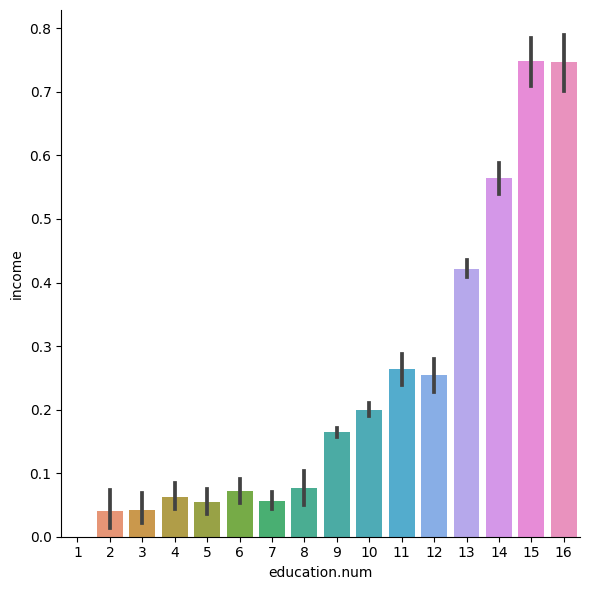

In [6]:
sns.catplot(x='education.num',y='income',data=dataset,kind='bar',height=6)
plt.show()

Higher the value ,higher the probability of income greater than 50k(Obviously!)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


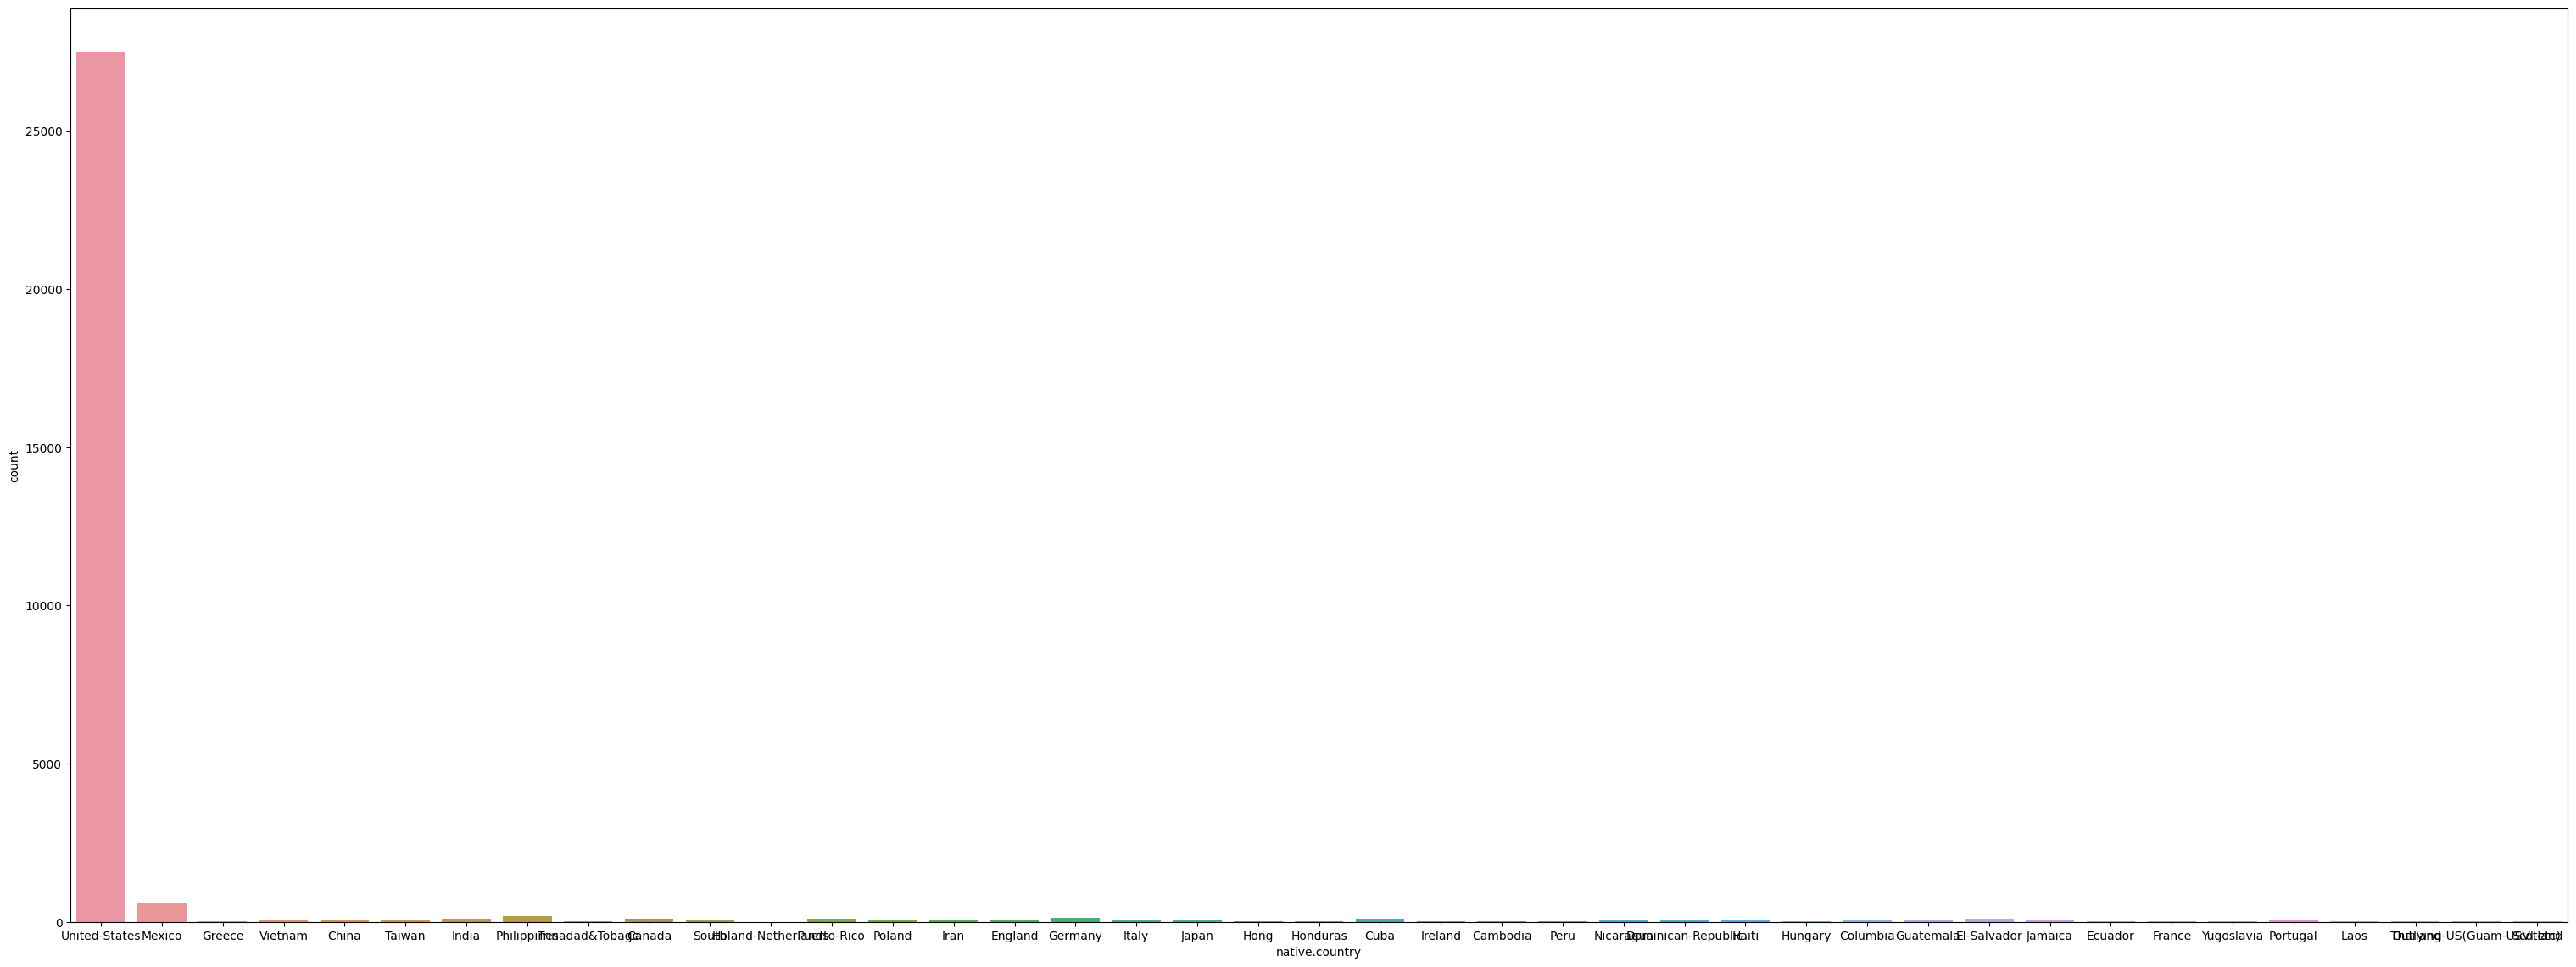

In [7]:
#explore which country do most people belong
plt.figure(figsize=(38,14))
sns.countplot(x='native.country',data=dataset)
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

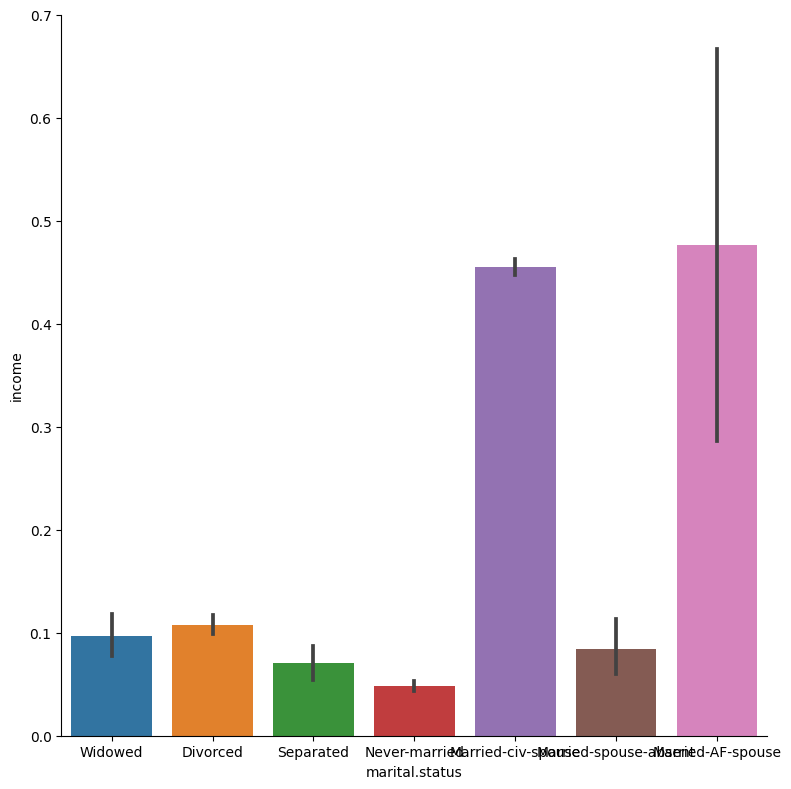

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# marital.status vs income
sns.catplot(x='marital.status', y='income', data=dataset, kind='bar', height=8)
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

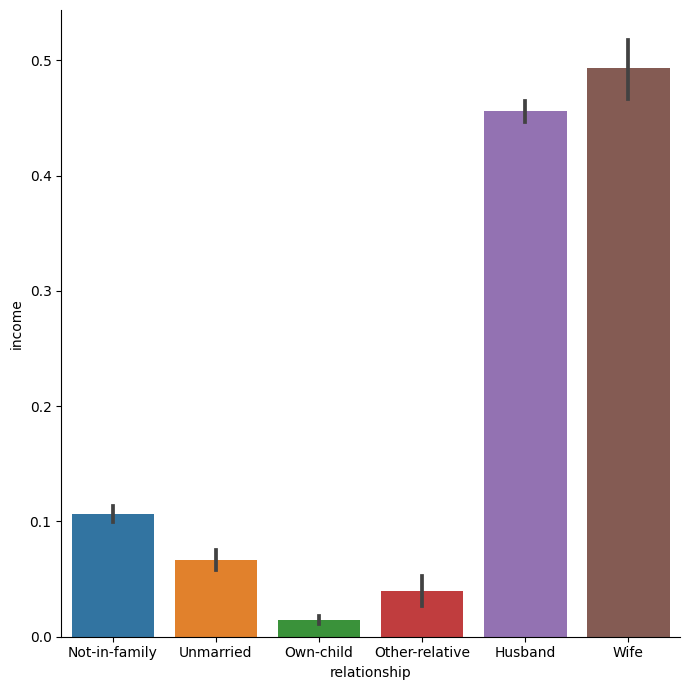

In [9]:
# relationship vs income
sns.catplot(x='relationship', y='income', data=dataset, kind='bar', height=7)
plt.show()

## Feature Engineering

In [10]:
#we can reformat marital.status values to single and married
dataset['marital.status']=dataset['marital.status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single', 'Never-married':'Single', 'Separated':'Single', 
'Widowed':'Single', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})

 ### *Label encoding*

In [11]:
from sklearn.preprocessing import LabelEncoder

for column in dataset.select_dtypes(include='object'):
    enc = LabelEncoder()
    dataset[column] = enc.fit_transform(dataset[column])


### *Correlation using heatmap*

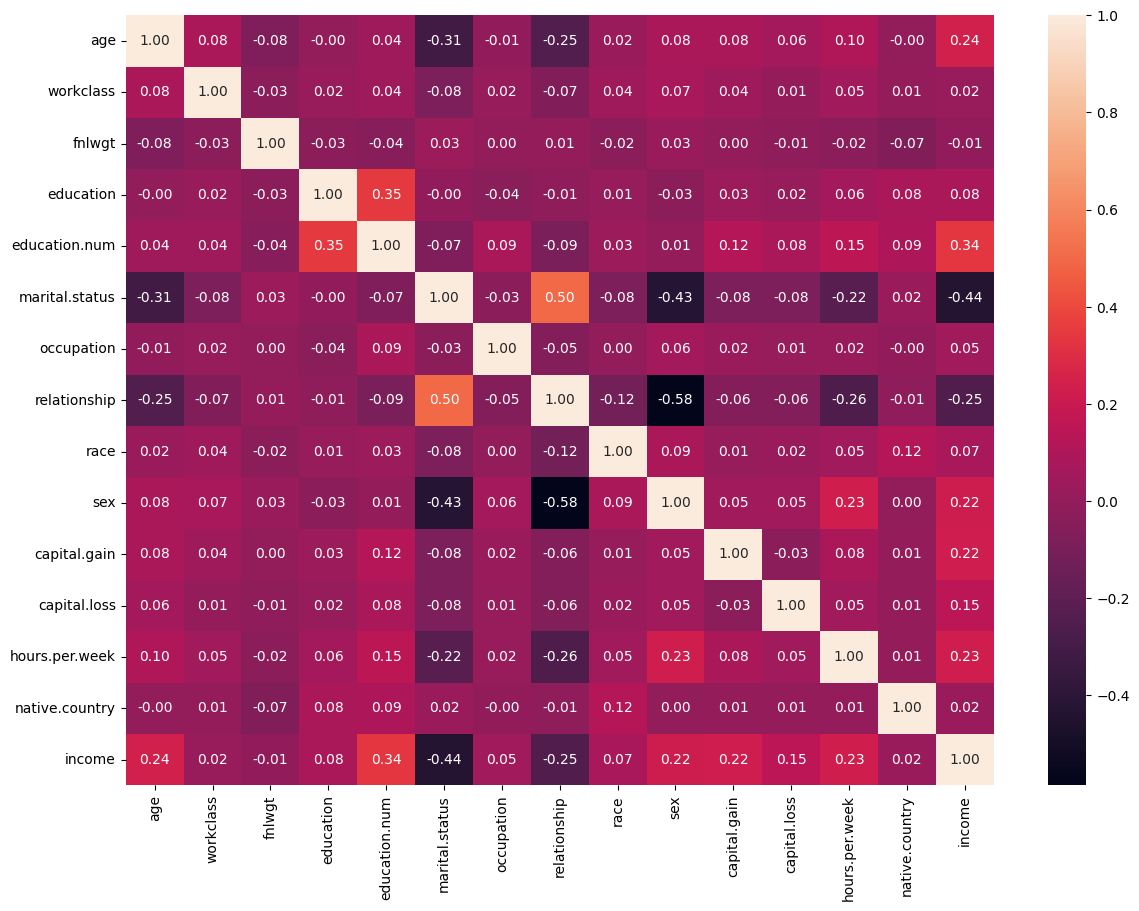

In [12]:
plt.figure(figsize=(14,10))
sns.heatmap(dataset.corr(),annot=True,fmt='.2f')
plt.show()

In [13]:
dataset=dataset.drop(['relationship','education'],axis=1)

In [14]:
dataset=dataset.drop(['occupation','fnlwgt','native.country'],axis=1)

 Dataset after preprocessing

In [15]:
print(dataset.head())

   age  workclass  education.num  marital.status  race  sex  capital.gain  \
1   82          2              9               1     4    0             0   
3   54          2              4               1     4    0             0   
4   41          2             10               1     4    0             0   
5   34          2              9               1     4    0             0   
6   38          2              6               1     4    1             0   

   capital.loss  hours.per.week  income  
1          4356              18       0  
3          3900              40       0  
4          3900              40       0  
5          3770              45       0  
6          3770              40       0  


Split the dataset into predictors and target and make training and testing sets

In [16]:
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]
print(X.head())
print(y.head())
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,shuffle=False)

   age  workclass  education.num  marital.status  race  sex  capital.gain  \
1   82          2              9               1     4    0             0   
3   54          2              4               1     4    0             0   
4   41          2             10               1     4    0             0   
5   34          2              9               1     4    0             0   
6   38          2              6               1     4    1             0   

   capital.loss  hours.per.week  
1          4356              18  
3          3900              40  
4          3900              40  
5          3770              45  
6          3770              40  
1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64


 We use cross validation(CV) to select which model to use.In k-fold CV a model is trained using k-1  of the folds as training data.Then the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

In [17]:
clf=GaussianNB()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

76.68213951528749


In [18]:
clf=DecisionTreeClassifier()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

74.20852582536827


In [19]:
clf=RandomForestClassifier(n_estimators=100)
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

76.84597616119851


## Model Tuning

### Gridsearch

 Instead of manually changing each parameter and comparing results,sklearn provides us with Gridsearch which uses crossvalidation to internally check all the parameters and compare results and gives us the best parameters as output.
 This is a time taking process.

In [ ]:
# USED GRIDSEARCH FOR HYPERPARAMETER TUNING-----
clf=RandomForestClassifier()
kf=KFold(n_splits=3)
max_features=np.array([1,2,3,4,5])
n_estimators=np.array([25,50,100,150,200])
min_samples_leaf=np.array([25,50,75,100])
param_grid=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)
grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=kf)
gres=grid.fit(x_train,y_train)
print("Best",gres.best_score_)
print("params",gres.best_params_)

'''
----------------OUTPUT------------------------
Best 0.810471100554236
params {'max_features': 5, 'min_samples_leaf': 50, 'n_estimators': 50}
'''

#### Note:- This  cell is commented out as it takes long time to compute(15-20 mins)

## Finalize the Model

### *Fit the model with tuned parameters*

In [ ]:
clf=RandomForestClassifier(n_estimators=50,max_features=5,min_samples_leaf=50)
clf.fit(x_train,y_train)

RandomForestClassifier(max_features=5, min_samples_leaf=50, n_estimators=50)

### *Make predictions*

In [ ]:
pred=clf.predict(x_test)
pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### *Evaluation metrics*

In [ ]:
print("Accuracy: %f " % (100*accuracy_score(y_test, pred)))

Accuracy: 84.589110 


## **XGBoost**

In [ ]:
import xgboost as xgb
xgb.__version__

'2.0.0'

In [ ]:
dmat=xgb.DMatrix(x_train,y_train)
test_dmat=xgb.DMatrix(x_test)

## **Bayesian Optimization**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import uniform, randint

# Assuming x_train and y_train are your training data
param_dist = {
    'min_child_weight': randint(0, 10),
    'max_depth': randint(0, 30),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'n_estimators': randint(50, 100),
    'reg_lambda': uniform(1, 100),
}

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error', eta=0.1)

random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best Hyperparameters: {'colsample_bytree': 0.7146050320241473, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 57, 'reg_lambda': 60.790302347693014, 'subsample': 0.7496855766520681}
Best Accuracy: 0.7841953720040049


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

XGBoost has an inbuilt cvmethod which helps us to find the rounds using early stopping to prevent overfitting

In [ ]:
final_p={'colsample_bytree': 1.0, 'max_depth': 3, 'min_child_weight': 0,'subsample': 0.5,'reg_lambda': 100.0,'objective':'binary:logistic','eta': 0.1,'n_estimators':50, "silent": 1}
cv_res=xgb.cv(params=final_p,dtrain=dmat,num_boost_round=1000,early_stopping_rounds=100,metrics=['error'],nfold=5)
cv_res.tail()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:56:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


,train-error-mean,train-error-std,test-error-mean,test-error-std
734,0.130109,0.000372,0.137520,0.003300
735,0.129949,0.000501,0.137817,0.003137
736,0.130085,0.000657,0.137619,0.003216
737,0.130072,0.000475,0.137371,0.003124
738,0.130085,0.000658,0.137173,0.003238


Now after finding the rounds required we train our final model with the tuned parameters and the rounds.We then validate it on our test set

In [ ]:
final_clf=xgb.train(params=final_p,dtrain=dmat,num_boost_round=837)
pred=final_clf.predict(test_dmat)
print(pred)
pred[pred > 0.5 ] = 1
pred[pred <= 0.5] = 0
print(pred)
print("\nAccuracy: ",accuracy_score(y_test,pred)*100)


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:46:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[8.8464266e-01 8.0791152e-01 5.4679960e-01 ... 2.8672355e-01 3.3943105e-02
 5.4113404e-04]
[1. 1. 1. ... 0. 0. 0.]
Accuracy:  85.0713281093028
